# Base Model

## Importing Necessary Dependencies

In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time

#core packages
import numpy as np
import matplotlib.pyplot as plt

#custom module
from dataPrep import load_dataset, load_sample_dataset
from dataPrep import visual_charts, visualize_dataset
from dataPrep import prep_dataset


np.random.seed(1)
%matplotlib inline

## Dataset Preparation

#### Loading Complete Dataset

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

print("Data\t\t\t","Datatype\t\t","Shape")
print("=================================================================")
print("Training Set Images:\t" + str(type(train_x_orig))+"\t",str(train_x_orig.shape))
print("Training Set Labels:\t" + str(type(train_y_orig))+"\t",str(train_y_orig.shape))
print("Dev Set Images:\t\t" + str(type(dev_x_orig))+"\t",str(dev_x_orig.shape))
print("Dev Set Labels:\t\t" + str(type(dev_y_orig))+"\t",str(dev_y_orig.shape))
print("Test Set Images:\t" + str(type(test_x_orig))+"\t",str(test_x_orig.shape))
print("Test Set Labels:\t" + str(type(test_y_orig))+"\t",str(test_y_orig.shape))
print("=================================================================")


Data			 Datatype		 Shape
Training Set Images:	<class 'numpy.ndarray'>	 (60000, 28, 28)
Training Set Labels:	<class 'numpy.ndarray'>	 (60000, 1)
Dev Set Images:		<class 'numpy.ndarray'>	 (5000, 28, 28)
Dev Set Labels:		<class 'numpy.ndarray'>	 (5000, 1)
Test Set Images:	<class 'numpy.ndarray'>	 (5000, 28, 28)
Test Set Labels:	<class 'numpy.ndarray'>	 (5000, 1)


#### Sampling the Dataset for Model Experiment

In [3]:
#loading Sample dataset
sample_size = 100
train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample = load_sample_dataset(sample_size)

print("Sample Size : %d%%\n"%(sample_size))
print("Data\t\t\t","Complete Dataset\t","Sample Dataset\t")
print("================================================================")
print("Training Set Images:\t"+ str(train_x_orig.shape)+"\t\t"+ str(train_x_sample.shape))
print("Training Set Labels:\t"+ str(train_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Training Set Images:\t"+ str(dev_x_orig.shape)+"\t\t"+ str(dev_x_sample.shape))
print("Training Set Labels:\t"+ str(dev_y_orig.shape)+"\t\t"+ str(dev_y_sample.shape))
print("Test Set Images:\t"+str(test_x_orig.shape)+"\t\t"+ str(test_x_sample.shape))
print("Test Set Labels:\t"+str(test_y_orig.shape)+"\t\t"+ str(test_y_sample.shape))
print("================================================================")


Sample Size : 100%

Data			 Complete Dataset	 Sample Dataset	
Training Set Images:	(60000, 28, 28)		(60000, 28, 28)
Training Set Labels:	(60000, 1)		(60000, 1)
Training Set Images:	(5000, 28, 28)		(5000, 28, 28)
Training Set Labels:	(5000, 1)		(5000, 1)
Test Set Images:	(5000, 28, 28)		(5000, 28, 28)
Test Set Labels:	(5000, 1)		(5000, 1)


#### Preparing the Dataset (Flattening and Normalizing)

In [4]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample)
print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_orig.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_orig.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_orig.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_orig.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_orig.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_orig.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(60000, 28, 28)		(784, 60000)
Training Set Labels:	(60000, 1)		(10, 60000)
Dev Set Images:		(5000, 28, 28)		(784, 5000)
Dev Set Labels:		(5000, 1)		(10, 5000)
Test Set Images:	(5000, 28, 28)		(784, 5000)
Test Set Labels:	(5000, 1)		(10, 5000)


#### Visualizing Datasets

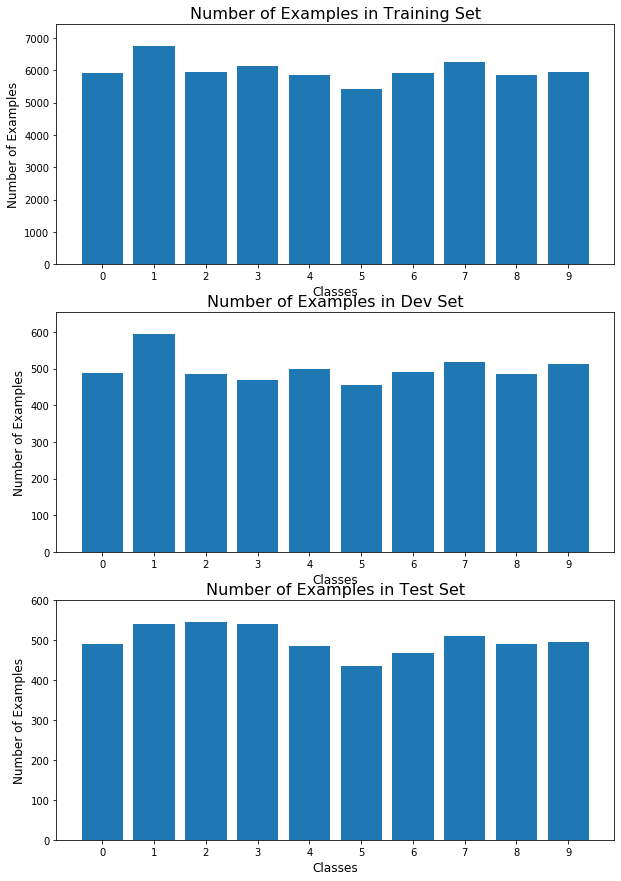

In [5]:
visual_charts(train_y_sample,dev_y_sample,test_y_sample)

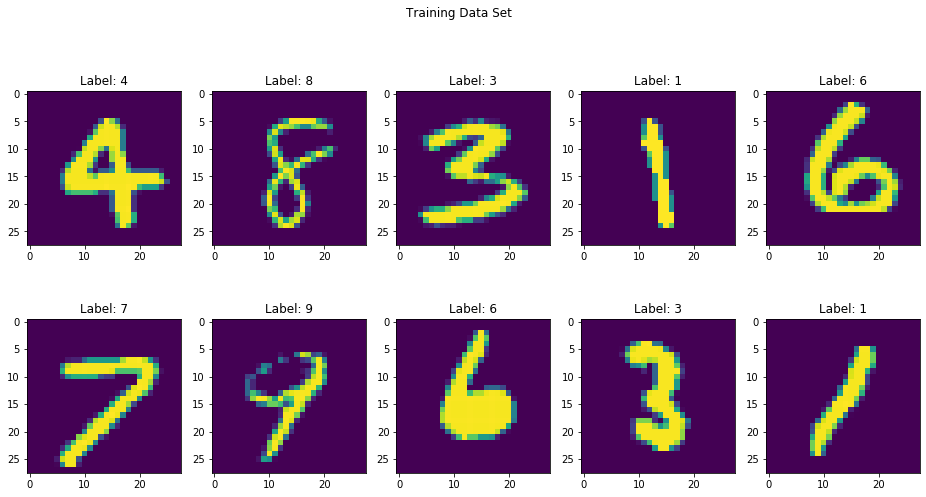

In [6]:
visualize_dataset(train_x_sample, train_y_sample, dataset = "training")

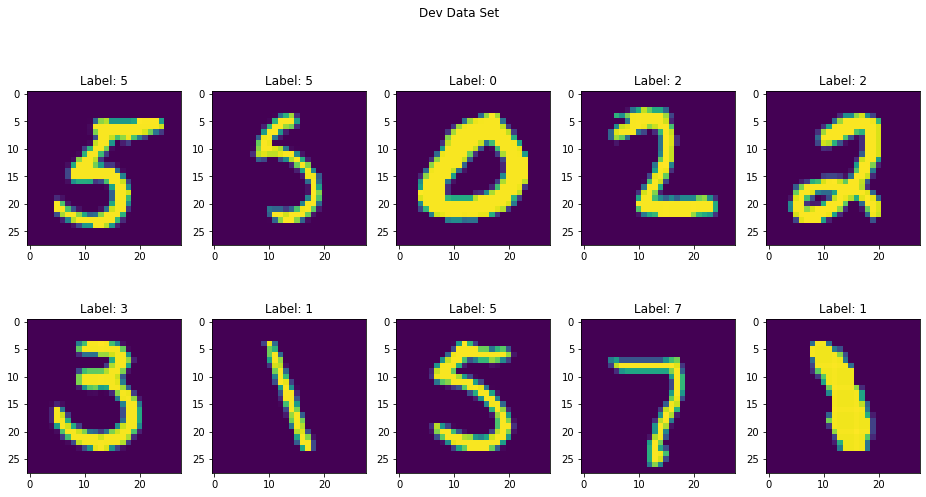

In [7]:
visualize_dataset(dev_x_orig, dev_y_orig, dataset = "dev")

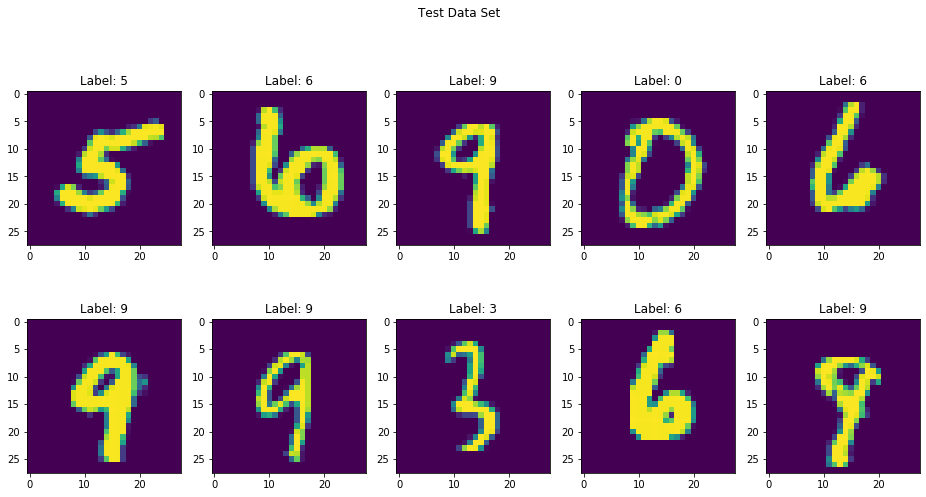

In [8]:
visualize_dataset(test_x_orig, test_y_orig, dataset = "test")

## Utility Functions

#### ReLU Function and Its derivative

In [9]:
def relu(Z):
    """
        Compute the ReLU activation of Z
        
        Argument:
            - Z -- Array of the Sum of the product of Weights and input
        
        Returns:
            - A -- Array of Activation obtained by applying ReLU function. same size as that of Z
    """
    A = np.maximum(0.0,Z)
    
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache

In [10]:
def relu_grad(dA, cache):
    """
        Compute the gradient of dA
        
        Arguments:
            - dA -- Array of the gradient of activation of the previous layer
            - cache -- list of other useful variables like Z
            
        Returns:
            - dZ -- array of gradient/derivative of the dA, Same size of dA
    """
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    dZ[Z < 0] = 0
    
    assert(dZ.shape == Z.shape)
    return dZ

#### Softmax Function and its derivative

In [11]:
def softmax(Z):
    """
        Compute the softmax activtion of Z
        
        Argument:
            - Z -- Array of the Sum of the product of Weights and input
        
        Returns:
            - A -- Array of Activation obtained by applying Softmax function. same size as that of Z
    """
    shift = Z - np.max(Z) #Avoiding underflow or overflow errors due to floating point instability in softmax
    t = np.exp(shift)
    A = np.divide(t,np.sum(t,axis = 0))
    
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache

## Deep Learning Model

### 1. Creating NN Architecture

#### initializing layers

In [12]:
def init_layers():
    """
        Initializes the layers of NN with certain neural units in each layers
        
        Returns:
            - layer_dim -- list of the units of each layer of the network
    """
    layers_dim = [784,32,16,10]
    return layers_dim

#### Initializing Parameters

In [13]:
def init_params(layers_dim):
    """
        Initializes the parameters of the Neural Network
        
        Argument:
            - layers_dim -- Layer Dimensions of the NN
        
        Returns:
            - params -- Dictionary of the initialized parameters: Weights and biases
    """
    L = len(layers_dim)
    params = {}
        
    for l in range(1,L):
        params['W' + str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) *0.01
        params['b' + str(l)] = np.zeros((layers_dim[l],1))
     
        assert(params['W' + str(l)].shape == (layers_dim[l],layers_dim[l-1]))
        assert(params['b' + str(l)].shape == (layers_dim[l],1))
    return params

#### Initializing Hyper Parameters

In [14]:
def init_hyperParams(alpha = 0.01, num_iteration = 5000):
    """
        Initializes the hyper parameters
        
        Arguments:
            - alpha -- learning rate
            - num_iteration -- number of iteration the gradient descent will run
        Returns:
            - Dictionary of hyper parameters
        
    """
    hyperParams = {}
    hyperParams['learning_rate'] = alpha
    hyperParams['num_iterations'] = num_iteration
    
    
    return hyperParams

### 2. Forward Propogation

#### Calculating sum of product of inputs and weights (Z) for individual layer

In [15]:
def forward_sum(A,W,b):
    """
        Calculates the forward sum 
        
        Arguments:
            - A -- array of activation from the previous layer
            - W -- weights of the current layer
            - b -- bias of the current layer
    """
    
    Z = np.dot(W,A) + b
    
    cache = (A,W,b)
    assert(Z.shape == (W.shape[0],Z.shape[1]))
    
    return Z, cache

#### Calculating Activation for individual Layer

In [16]:
def forward_activation(A,W,b,activation):
    
    if activation == 'relu':
        Z, sum_cache = forward_sum(A,W,b)
        A, activation_cache = relu(Z)
        
    if activation == 'softmax':
        Z, sum_cache = forward_sum(A,W,b)
        A, activation_cache = softmax(Z)
    
    cache = (sum_cache,activation_cache)
    assert(A.shape == Z.shape)
    
    return A, cache

#### Complete Forward Propagation for L layers

In [17]:
def forward_prop(X,parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A 
        A, cache = forward_activation(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation='relu')
        caches.append(cache)

    AL, cache = forward_activation(A,parameters['W' + str(L)],parameters['b' + str(L)],activation='softmax')
    caches.append(cache)
    
    assert(AL.shape == (10,X.shape[1]))
    
    return AL,caches
    

### 3. Cost Function

In [18]:
def compute_cost(AL,Y):
    m = Y.shape[1]

    cost = -(1./m) * np.sum(np.sum(np.multiply(Y,np.log(AL)), axis = 0,keepdims=True))
    
    cost = np.squeeze(cost)      # Making sure your cost's shape is not returned as ndarray
    assert(cost.shape == ())
    
    return cost

### 4. Backward Propagation

#### Calculating Gradients for individual Layer

In [19]:
def backward_grad(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * np.dot(dZ,A_prev.T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims=True )
    dA_prev = np.dot(W.T, dZ)

    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    
    return dA_prev, dW, db

#### Calculating Backward Activation for individual layer

In [20]:
def backward_activation(dA,cache,activation):
    sum_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_grad(dA,activation_cache)
        dA_prev, dW, db = backward_grad(dZ, sum_cache)
        
    elif activation == "softmax":
        dZ = dA
        dA_prev, dW, db = backward_grad(dA, sum_cache)
    
    return dA_prev, dW, db
    
    

#### Complete Backward Propagation for L layers

In [21]:
def backward_prop(AL, Y,caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dA = np.subtract(AL,Y)
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_activation(dA, current_cache, activation = 'softmax')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = backward_activation(grads["dA" + str(l + 1)], current_cache, activation = 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### 5. Update Parameters

In [22]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])
    return parameters

### 6.  Prediction 

In [23]:
def predict(X,y,parameters):
    m = y.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    
    probas, caches = forward_prop(X, parameters)
   
    assert(probas.shape == y.shape)
        
    predicted_labels = np.argmax(probas,axis=0).reshape(1,probas.shape[1])
    predicted_prob = np.max(probas,axis = 0).reshape(1,m)
    
    Y = np.argmax(y,axis=0).reshape(1,y.shape[1])
    
    true_prediction = np.equal(predicted_labels,Y)
    
    num_correct_labels = np.sum(true_prediction)
    accuracy = num_correct_labels / m
        
    return predicted_labels, predicted_prob, accuracy


#### Visualizing the costs and accuracy for model analysis

In [24]:
def visualize_results(attr, attr_type):
    
    plt.plot(np.squeeze(attr))
    if attr_type == 'costs':
        plt.ylabel("cost")
        plt.title("Cost")
        
    elif attr_type == 'train_accs':
        plt.ylabel("accuracy")
        plt.title("Training Accuracy")
        
    elif attr_type == 'val_accs':
        plt.ylabel("accuracy")
        plt.title("Validation Accuracy")
        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
        
    plt.xlabel('iterations (per hundreds)')
    plt.show()

### 7. Train Model

In [25]:
def train(X_train, Y_train, X_dev, Y_dev, layers_dim, hyperParams):

    learning_rate = hyperParams['learning_rate']
    num_iterations = hyperParams['num_iterations']
    
    np.random.seed(1)
    costs = []      # keep track of cost
    train_accs = []  # keep track of training accuracy
    val_accs = []     # keep track of Validation accuracy
    
    parameters = init_params(layers_dim)
    
    for i in range(0, num_iterations):

        AL, caches = forward_prop(X_train, parameters)
        
        cost = compute_cost(AL, Y_train)
    
        grads = backward_prop(AL, Y_train, caches)
 
        parameters = update_parameters(parameters, grads, learning_rate)
                
        _,_,train_acc = predict(X_train, Y_train,parameters)
        _,_,val_acc= predict(X_dev, Y_dev,parameters)        
        
        if i == 0 or (i+1) % 200 == 0:
            print ("Iteration: %d == Cost: %f || Training acc: %f || Val acc: %f"%(i,cost,train_acc,val_acc))
        if i == 0 or (i+1) % 100 == 0:
            costs.append(cost)
            train_accs.append(train_acc)
            val_accs.append(val_acc)
            
            
    visualize_results(costs, attr_type='costs')  
    visualize_results(train_accs, attr_type='train_accs')       
    visualize_results(val_accs, attr_type='val_accs')       
    
    return parameters

### Running Model

Iteration: 0 == Cost: 2.302584 || Training acc: 0.112367 || Val acc: 0.119000
Iteration: 199 == Cost: 2.301098 || Training acc: 0.112367 || Val acc: 0.119000
Iteration: 399 == Cost: 2.300742 || Training acc: 0.112367 || Val acc: 0.119000
Iteration: 599 == Cost: 2.292399 || Training acc: 0.125850 || Val acc: 0.135400
Iteration: 799 == Cost: 1.562681 || Training acc: 0.483900 || Val acc: 0.493800
Iteration: 999 == Cost: 0.728470 || Training acc: 0.775083 || Val acc: 0.780200
Iteration: 1199 == Cost: 0.574855 || Training acc: 0.828917 || Val acc: 0.838400
Iteration: 1399 == Cost: 0.499987 || Training acc: 0.856733 || Val acc: 0.858200
Iteration: 1599 == Cost: 0.440030 || Training acc: 0.875033 || Val acc: 0.875000
Iteration: 1799 == Cost: 0.370123 || Training acc: 0.894600 || Val acc: 0.895400
Iteration: 1999 == Cost: 0.318842 || Training acc: 0.908633 || Val acc: 0.908200
Iteration: 2199 == Cost: 0.283214 || Training acc: 0.918433 || Val acc: 0.917200
Iteration: 2399 == Cost: 0.254448 ||

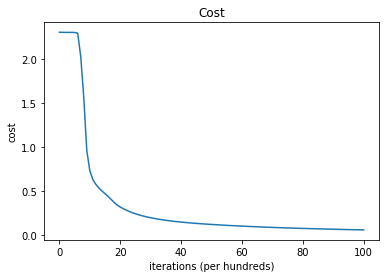

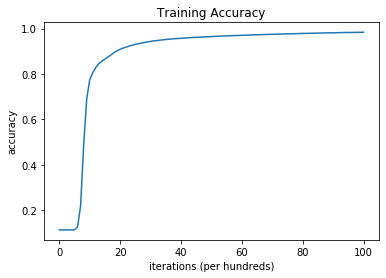

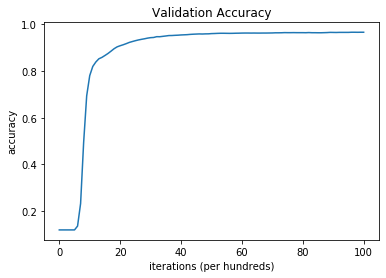

In [26]:
hyperParams = init_hyperParams(alpha = 0.1,ite = 10000)
layers_dim = init_layers()
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams)

In [27]:
predicted_labels_train, prediction_prob_train,train_acc = predict(train_x_norm, train_y_encoded,parameters)
print("\nAccuracy: "  + str(train_acc))
print("\nError:\t"+str(1-train_acc))


Accuracy: 0.9839

Error:	0.016100000000000003


In [28]:
predicted_labels_dev, prediction_prob_prob,dev_acc = predict(dev_x_norm, dev_y_encoded,parameters)
print("\nAccuracy: "  + str(dev_acc))
print("\nError:\t"+str(1-dev_acc))


Accuracy: 0.966

Error:	0.03400000000000003


In [29]:
predicted_labels_test, prediction_prob_prob,test_acc = predict(test_x_norm, test_y_encoded,parameters)
print("\nAccuracy: "  + str(test_acc))
print("\nError:\t"+str(1-test_acc))


Accuracy: 0.964

Error:	0.03600000000000003


#### Confusion Matrix

In [30]:
def confusion_matrix(y_orig,y_predicted):
    m = y_orig.shape[0]
    k = len(np.unique(y_orig)) # or simply take k =10
    
    cm = np.zeros((k,k))

    for i in range(m):
        cm[y_orig[i],y_predicted[i]] += 1
   
    return cm.astype(int)

In [31]:
cm_train = confusion_matrix(train_y_sample,predicted_labels_train.T)
print("\nConfusion Matrix for Training set:\n")
print(cm_train)

cm_dev = confusion_matrix(dev_y_sample,predicted_labels_dev.T)
print("\nConfusion Matrix for Dev set:\n")
print(cm_dev)

cm_test = confusion_matrix(test_y_sample,predicted_labels_test.T)
print("\nConfusion Matrix for Test set:\n")
print(cm_test)


Confusion Matrix for Training set:

[[5872    0   11    0    0    2   14    1   19    4]
 [   1 6681   16   10    1    0    0    8   20    5]
 [  17    7 5865   16    5    0    8   15   21    4]
 [   0    3   32 5988    0   37    2   18   26   25]
 [   0    8    3    0 5773    1   11    2    2   42]
 [  14    1    0   31    2 5318   13    1   27   14]
 [  14    3    5    0    7   12 5862    0   15    0]
 [   2   17   18    6    6    2    1 6165   11   37]
 [  15   24   21   11    4   18   13    9 5714   22]
 [   8    5    2   23   38   13    1   42   21 5796]]

Confusion Matrix for Dev set:

[[479   1   2   0   1   3   2   0   1   0]
 [  0 581   1   2   0   0   3   1   7   0]
 [  3   0 470   3   0   0   3   5   2   0]
 [  0   1   2 454   0   5   0   3   4   0]
 [  0   0   2   0 482   1   5   0   0   8]
 [  5   0   0   4   3 435   1   1   5   2]
 [  4   1   0   0   5   1 476   0   2   1]
 [  0   4   6   2   1   0   0 502   0   4]
 [  0   3   2   4   2   4   1   1 466   2]
 [  1   2   0

In [54]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots(figsize=(10,10))
    im = plt.imshow(cm,cmap="GnBu") #RdYlGn, PiYG, Accent,Blues,viridis, YlGnBu


    fig.colorbar(im,ax=ax,fraction=0.045)
    # ax.set_aspect('auto')

    ax.set_title("Confusion Matrix",fontsize=24,pad = 20)
    ax.set_xticks(range(0,10))
    ax.set_yticks(range(0,10))
    ax.set_xlabel("Predicted", fontsize = 20)
    ax.set_ylabel("Expexted", fontsize = 20)

    ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9],fontsize=16)
    ax.set_yticklabels([0,1,2,3,4,5,6,7,8,9],fontsize=16)

    #setting horizontal axes labeling to top.
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')


    # Turn off all the ticks
    ax.tick_params(top=False,left=False)


    thres = cm.max()//2

    for i in range(10):
        for j in range(10):
            per = cm[i,j]/cm.sum() * 100
            text = ax.text(j, i, "%d\n%.2f%%"%(cm[i, j], per),
                           ha="center", va="center", color="w" if cm[i,j] > thres else "black")


    fig.tight_layout()
    plt.show()


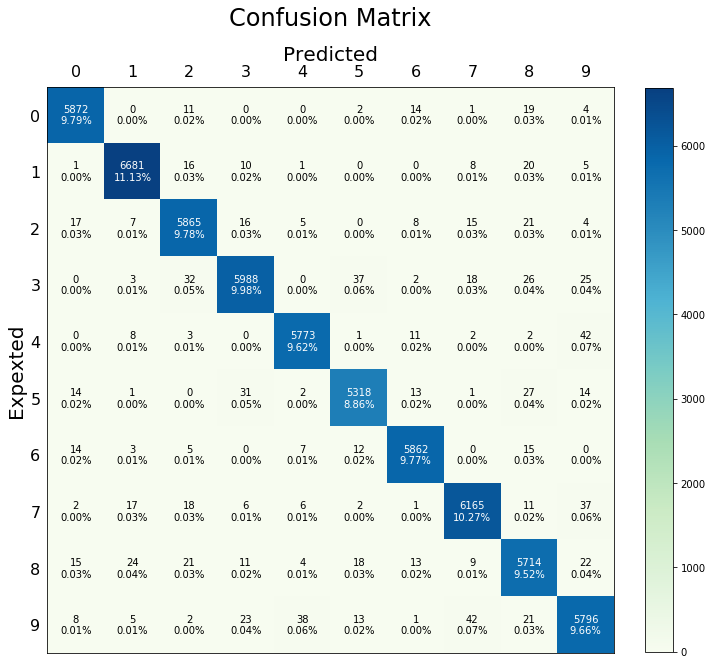

In [55]:
#plotting the confusion matrix   
plot_confusion_matrix(cm_train)

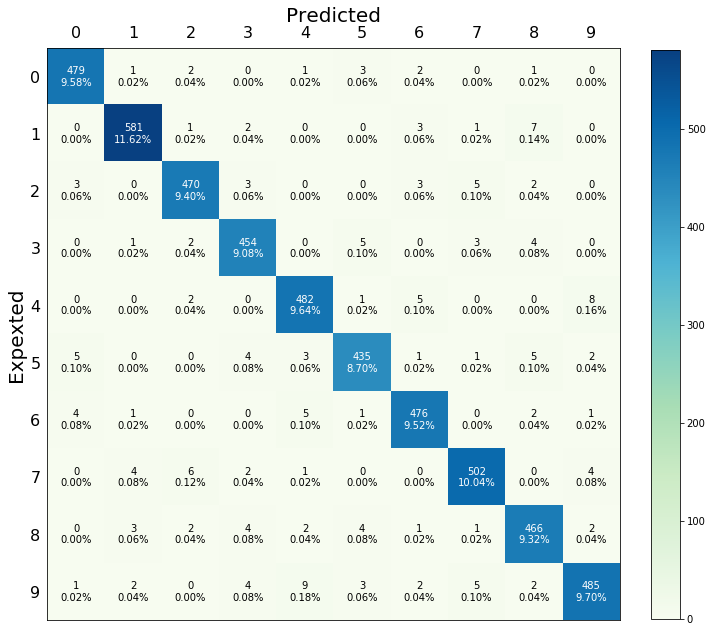

In [34]:
plot_confusion_matrix(cm_dev)

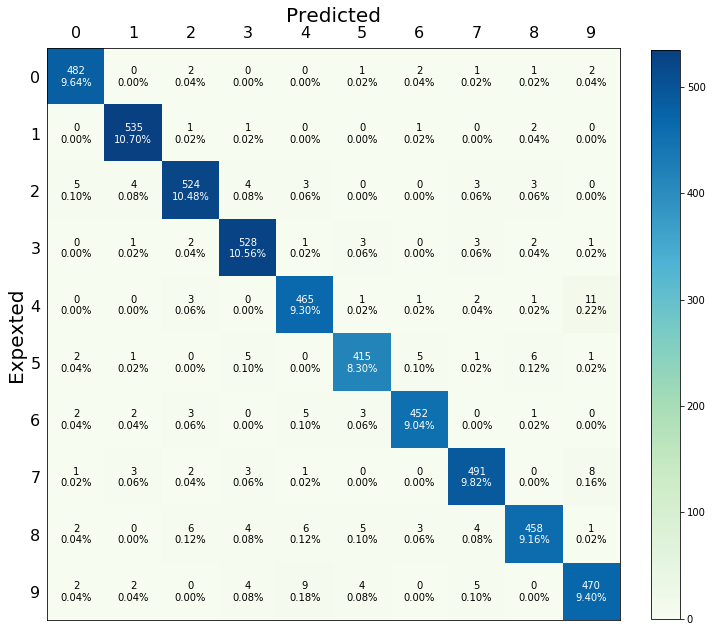

In [35]:
plot_confusion_matrix(cm_test)

In [36]:
def precision(label, cm):
    col = cm[:, label]
    prec = cm[label, label] / col.sum()
    return prec
    
def recall(label, cm):
    row = cm[label, :]
    rec = cm[label, label] / row.sum()
    return rec

def precision_average(prec):
    count = len(prec)    
    prec_mac_avg = np.sum(prec) / count
    return prec_mac_avg

def recall_average(rec):
    count = len(rec)
    rec_mac_avg = np.sum(rec) / count
    return rec_mac_avg

def accuracy(cm):
    diagonal_sum = cm.trace()
    sum_of_all_elements = cm.sum()
    acc = diagonal_sum / sum_of_all_elements 
    return acc

def f1_score(prec,rec):
    f1 = (2 * prec * rec) / (prec + rec)
    return f1

def summary(cm):
    print("+=======+===============+===============+==========+")
    print("| Label\t| Precision \t| Recall \t| F1 Score |")
    print("+=======+===============+===============+==========+")
    prec = []
    rec = []
    f1 = []
    for label in range(10):
        prec.append(precision(label, cm))
        rec.append(recall(label, cm))
        f1.append(f1_score(prec[label], rec[label]))
        print("| %d \t|  %.3f \t|  %.3f \t|  %.3f   |"%(label, prec[label], rec[label], f1[label]))


    print("+=======+===============+===============+==========+") 
    avg_precision = precision_average(prec)
    avg_recall = recall_average(rec)
    acc = accuracy(cm)
    print("\nAvg Precision:\t"+ str(avg_precision) )
    print("Avg Recall:\t"+ str(avg_recall) )
    print("Accuracy:\t"+ str(acc))


In [37]:
summary(cm_train)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  0.988 	|  0.991 	|  0.990   |
| 1 	|  0.990 	|  0.991 	|  0.990   |
| 2 	|  0.982 	|  0.984 	|  0.983   |
| 3 	|  0.984 	|  0.977 	|  0.980   |
| 4 	|  0.989 	|  0.988 	|  0.989   |
| 5 	|  0.984 	|  0.981 	|  0.983   |
| 6 	|  0.989 	|  0.991 	|  0.990   |
| 7 	|  0.985 	|  0.984 	|  0.984   |
| 8 	|  0.972 	|  0.977 	|  0.975   |
| 9 	|  0.974 	|  0.974 	|  0.974   |
+=======+===============+===============+==========+

Avg Precision:	0.9838174026105724
Avg Recall:	0.9838039417325566
Accuracy:	0.9839


In [38]:
summary(cm_dev)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  0.974 	|  0.980 	|  0.977   |
| 1 	|  0.980 	|  0.976 	|  0.978   |
| 2 	|  0.969 	|  0.967 	|  0.968   |
| 3 	|  0.960 	|  0.968 	|  0.964   |
| 4 	|  0.958 	|  0.968 	|  0.963   |
| 5 	|  0.962 	|  0.954 	|  0.958   |
| 6 	|  0.966 	|  0.971 	|  0.968   |
| 7 	|  0.969 	|  0.967 	|  0.968   |
| 8 	|  0.953 	|  0.961 	|  0.957   |
| 9 	|  0.966 	|  0.945 	|  0.956   |
+=======+===============+===============+==========+

Avg Precision:	0.9656613961220011
Avg Recall:	0.9657851910078519
Accuracy:	0.966


In [39]:
summary(cm_test)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  0.972 	|  0.982 	|  0.977   |
| 1 	|  0.976 	|  0.991 	|  0.983   |
| 2 	|  0.965 	|  0.960 	|  0.962   |
| 3 	|  0.962 	|  0.976 	|  0.969   |
| 4 	|  0.949 	|  0.961 	|  0.955   |
| 5 	|  0.961 	|  0.952 	|  0.956   |
| 6 	|  0.974 	|  0.966 	|  0.970   |
| 7 	|  0.963 	|  0.965 	|  0.964   |
| 8 	|  0.966 	|  0.937 	|  0.951   |
| 9 	|  0.951 	|  0.948 	|  0.949   |
+=======+===============+===============+==========+

Avg Precision:	0.9638981906639634
Avg Recall:	0.9635301320910699
Accuracy:	0.964


#### Visualizating  Prediction

In [40]:
def visualize_prediction(x_orig, y_orig, predicted_labels, prediction_prob, dataset):
    if(dataset == "training"):
        visual_title = "Sample Training Data Set"
        rng = range(30,40)
    elif(dataset == "dev"):
        visual_title = "Sample Dev Data Set"
        rng = range(110,120)
    elif(dataset == "test"):
        visual_title = "Sample Test Data Set"
        rng = range(110,120)        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),rng):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest', cmap='Greys')
        ax.set(title = "True: "+ str(y_orig[0,i])+" | Predicted: "+str(predicted_labels[0,i]))
        ax.set(xlabel= "Prediction Prob: %f"%(prediction_prob[0,i]))
    

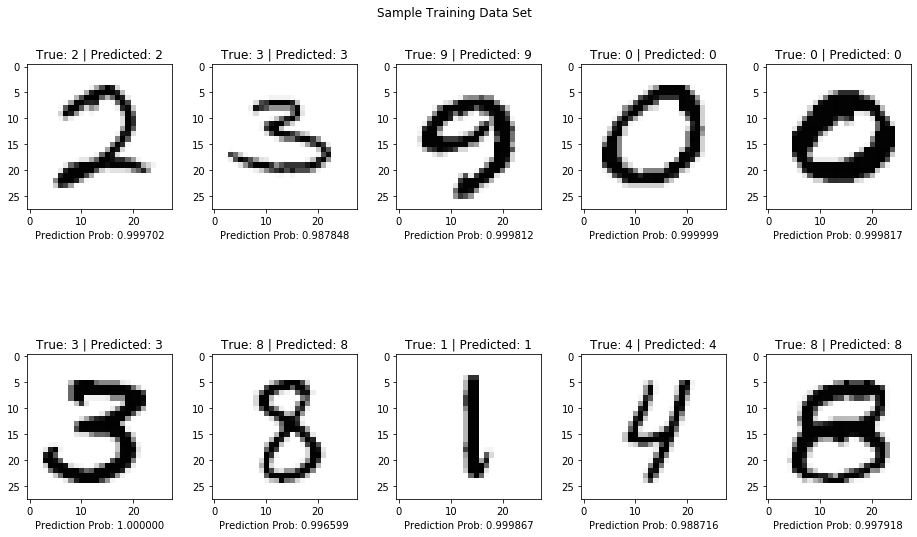

In [41]:
visualize_prediction(train_x_sample, train_y_sample.T,predicted_labels_train, prediction_prob_train,dataset = "training")

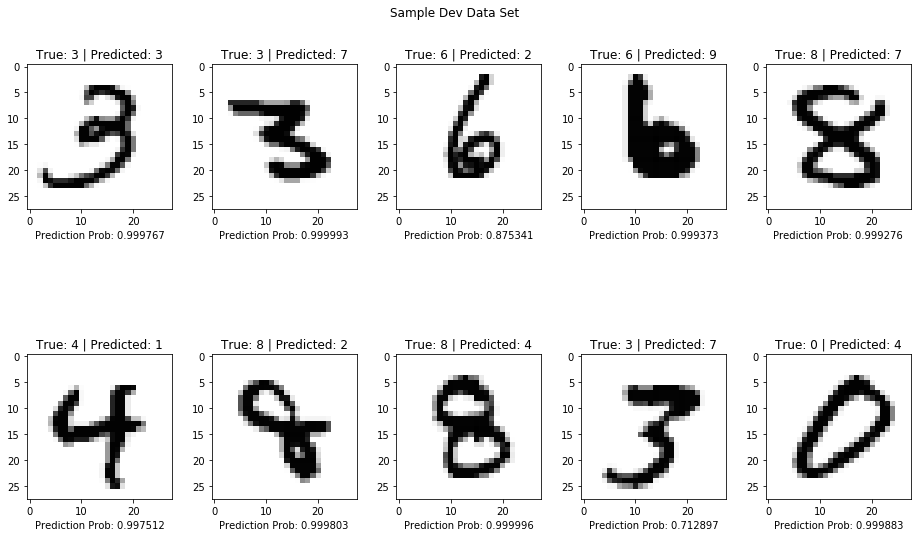

In [42]:
visualize_prediction(dev_x_orig, dev_y_orig.T, predicted_labels_dev, prediction_prob_prob,dataset = "dev")

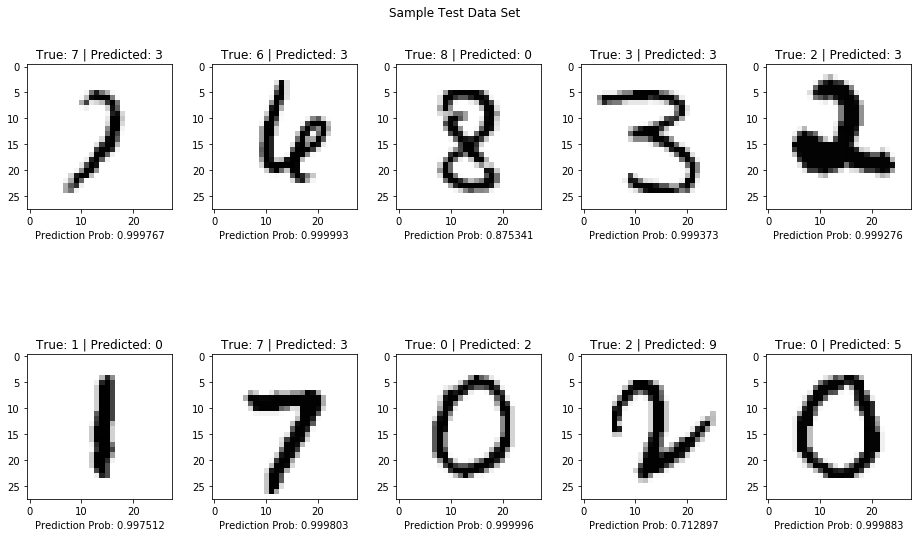

In [43]:
visualize_prediction(test_x_orig, test_y_orig.T, predicted_labels_test, prediction_prob_prob,dataset = "test")

#### Visualizing Mislabelled Images in all datasets

In [44]:
def visualize_mislabelled_images(x_orig,y_orig,predicted_labels,prediction_prob,dataset):
    true_prediction = np.equal(predicted_labels,y_orig)
    mislabelled_indices = np.asarray(np.where(true_prediction == False))
    print("Total Mislabelled Images: "+str(len(mislabelled_indices[0])))
    
    if(dataset == "training"):
        visual_title = "Sample Mislabelled Training Images"
    elif(dataset == "dev"):
        visual_title = "Sample Mislabelled Dev Images"
    elif(dataset == "test"):
        visual_title = "Sample Mislabelled Test Images"
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),mislabelled_indices[1]):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest')
        ax.set(title = "True: "+ str(y_orig[0,i])+" | Predicted: "+str(predicted_labels[0,i]))
        ax.set(xlabel= "Prediction Prob: %f"%(prediction_prob[0,i]))
    

Total Mislabelled Images: 966


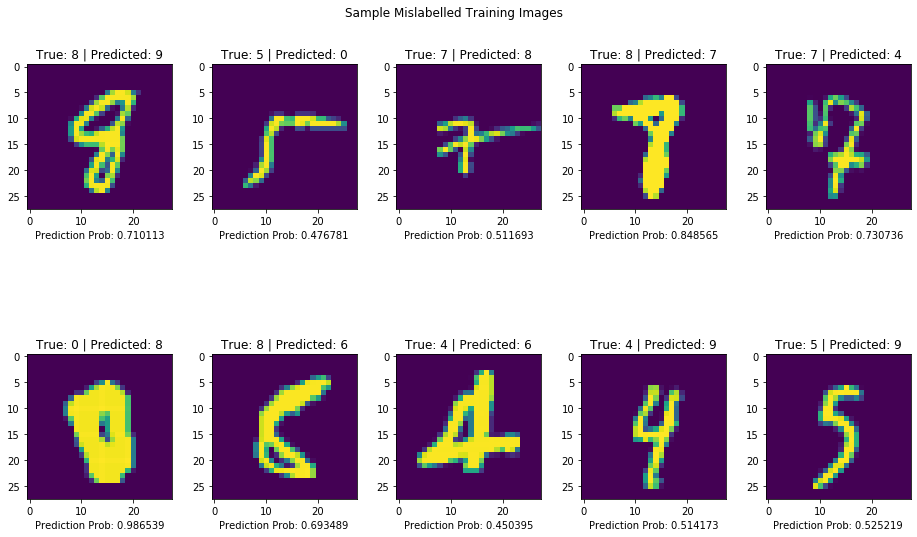

In [45]:
visualize_mislabelled_images(train_x_sample, train_y_sample.T,predicted_labels_train, prediction_prob_train,dataset = "training")

Total Mislabelled Images: 170


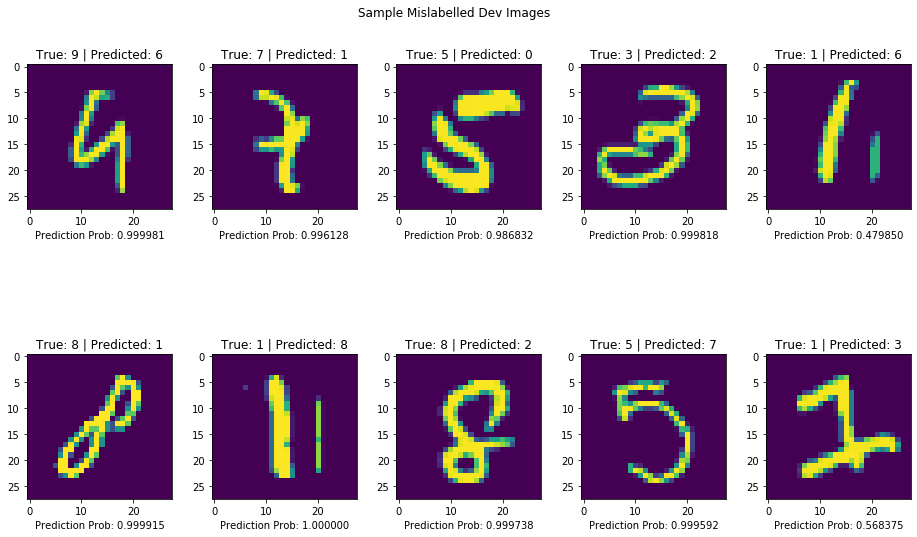

In [46]:
visualize_mislabelled_images(dev_x_sample, dev_y_sample.T, predicted_labels_dev, prediction_prob_prob,dataset = "dev")

Total Mislabelled Images: 180


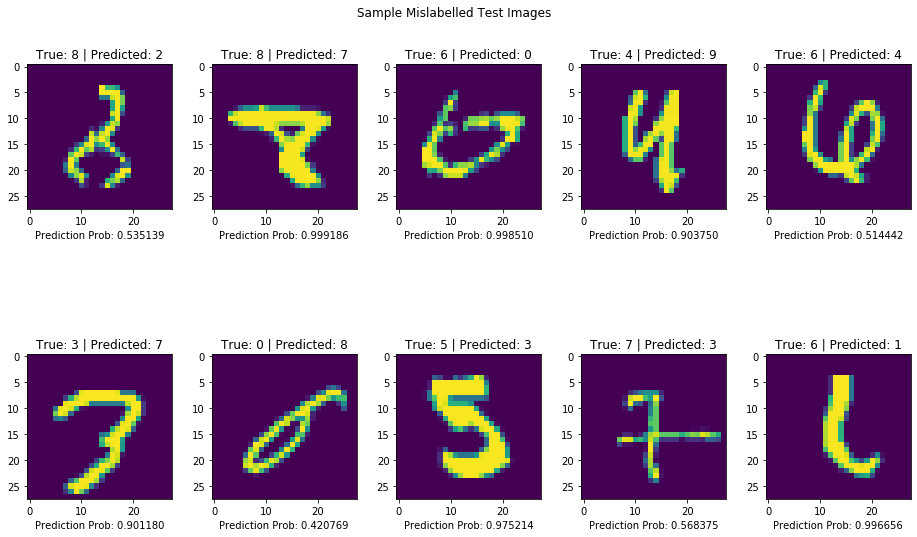

In [47]:
visualize_mislabelled_images(test_x_sample, test_y_sample.T, predicted_labels_test, prediction_prob_prob,dataset = "test")

### Predicting Real Time images

In [48]:
from PIL import Image
from dataPrep import one_hot_encoding

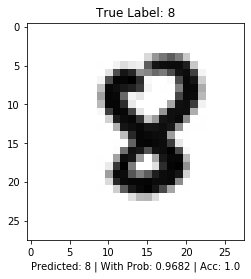

In [49]:
image_name = "8_1.jpg" 
label = np.array([8]).reshape(1,1)

fname = "dataset/" + image_name

image_data =255 - np.asarray(Image.open(fname).convert('L').resize((28,28)))
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label)

pridected_label,pred_prob,acc = predict(image_norm, label_encoded, parameters)

plt.title("True Label: "+ str(label.squeeze()))
plt.xlabel("Predicted: %d | With Prob: %.4f | Acc: %.1f"%(pridected_label.squeeze(), pred_prob.squeeze(),acc))
plt.imshow(image_data, interpolation ='nearest',cmap='binary')
